# Descrição

Neste projeto vamos analisar os dados de um banco com o intuito de identificar quais informações podem nos indicar possíveis clientes inadimplentes.

Vamos levar em consideração muitas variáveis disponíveis na base de dados e tentar relacionar uma ou mais delas com este fator.

# Iniciando as importações

Vamos iniciar importando todas os pacotes com os quais iremos trabalhar nessa análise.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carregando a base de dados. Estes dados também estão disponíveis neste [link](https://drive.google.com/file/d/1PhDG0inFUAb-EeX476z3myPkKj1ZQrf6/view?usp=sharing).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/publico/credito.csv', na_values='na')

# Primeiras explorações

Vamos fazer uma primeira observação dos dados olhando para uma pequena parte das informações.

In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Na análise abaixo vemos que temos dados importantes que deveriam de estar em formato numérico que são as variáveis *limite_credito* e *valor_transacoes_12m*. Ambas necessitam ser convertidas para que possam ser processadas.

In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Vamos verificar agora a contagem de linhas e colunas do nosso dataframe. (10127 linhas e 16 colunas)

In [ ]:
df.shape


(10127, 16)

Podemos verificar que há valores faltantes na base com as informações abaixo, nas variáveis *escolaridade*, *estado_civil* e *salario_anual*.
Os valores da coluna **Non-Null Count** destas variáveis não tem o mesmo valor da soma total de linhas, e podem gerar algum tipo de inconsistência para a nossa análise.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Com esta visualização confirmamos a ausência de dados em algumas variáveis.

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Em seguida estão as colunas que estão em formato não-numérico. Podemos observar que a formatação está em um padrão que o Python não reconhece como numérico. (ponto "." para casa de milhar e vírgula "," para as casas decimais)

In [ ]:
df[['limite_credito','valor_transacoes_12m']]

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"
...,...,...
10122,"4.003,91","15.476,26"
10123,"4.277,04","8.764,88"
10124,"5.409,16","10.291,78"
10125,"5.281,84","8.395,62"


# Limpeza e transformação

## Conversão
Para conseguir trabalhar com os dados acima vamos precisar alterar sua formatação e realizar a conversão para variável númerica.

Mas antes vamos verificar com variáveis temporárias como vão ficar antes de aplicar na base.

In [ ]:
limite_credito = df['limite_credito'].str.replace('.', '').str.replace(',', '.').astype(float)

valor_transacoes_12m = df['valor_transacoes_12m'].str.replace('.', '').str.replace(',', '.').astype(float)

In [ ]:
limite_credito

0        12691.51
1         8256.96
2         3418.56
3         3313.03
4         4716.22
           ...   
10122     4003.91
10123     4277.04
10124     5409.16
10125     5281.84
10126    10388.80
Name: limite_credito, Length: 10127, dtype: float64

In [ ]:
valor_transacoes_12m

0         1144.90
1         1291.45
2         1887.72
3         1171.56
4          816.08
           ...   
10122    15476.26
10123     8764.88
10124    10291.78
10125     8395.62
10126    10294.96
Name: valor_transacoes_12m, Length: 10127, dtype: float64

Vamos aplicar as alterações.

In [ ]:
df['limite_credito'] = df['limite_credito'].str.replace('.', '').str.replace(',', '.').astype(float)

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '').str.replace(',', '.').astype(float)

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']]

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08
...,...,...
10122,4003.91,15476.26
10123,4277.04,8764.88
10124,5409.16,10291.78
10125,5281.84,8395.62


In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

## Consistência

Como pudemos verificar, existem 3 variáveis que apresentam ausência de dados.

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Precisamos analisar se podemos apagar as linhas que apresentam esses problemas, sem impactar na nossa análise. Uma forma de analisar é checar a porcentagem de ocorrências na base completa e também individualmente em relação ao nosso target, que é a nossa variável *default*.

Analisando a base separando pelas variáveis *default*.

Vamos criar uma função para calcular as porcentagens de dados ausentes.

In [ ]:
def calcula_porcentagem(base, total, coluna):

  var = round(((base[coluna].isna().sum())/total*100),2)
  print(f'A porcentagem de dados faltantes no campo {coluna} é de {var}')
  return

Analisando a base completa.

In [ ]:
calcula_porcentagem(df, df.shape[0], 'escolaridade')
calcula_porcentagem(df, df.shape[0], 'estado_civil')
calcula_porcentagem(df, df.shape[0], 'salario_anual')

A porcentagem de dados faltantes no campo escolaridade é de 15.0
A porcentagem de dados faltantes no campo estado_civil é de 7.4
A porcentagem de dados faltantes no campo salario_anual é de 10.98


Agora vamos separar nosso dataframe pela variável default.

In [ ]:
df_0 = df[df['default'] == 0]
df_1 = df[df['default'] == 1]

Abaixo o cálculo da porcentagem de dados faltantes para os clientes adimplentes.

In [ ]:
calcula_porcentagem(df_0, df_0.shape[0], 'escolaridade')
calcula_porcentagem(df_0, df_0.shape[0], 'estado_civil')
calcula_porcentagem(df_0, df_0.shape[0], 'salario_anual')

A porcentagem de dados faltantes no campo escolaridade é de 14.86
A porcentagem de dados faltantes no campo estado_civil é de 7.29
A porcentagem de dados faltantes no campo salario_anual é de 10.88


E o cálculo para os dados faltantes na base de cliente inadimplentes.

In [ ]:
calcula_porcentagem(df_1, df_1.shape[0], 'escolaridade')
calcula_porcentagem(df_1, df_1.shape[0], 'estado_civil')
calcula_porcentagem(df_1, df_1.shape[0], 'salario_anual')

A porcentagem de dados faltantes no campo escolaridade é de 15.73
A porcentagem de dados faltantes no campo estado_civil é de 7.93
A porcentagem de dados faltantes no campo salario_anual é de 11.49


Observamos que as proporções tem uma variação muito pequena, mantendo uma proximidade em que não afetaremos a base se excluirmos as linhas que possuem dados faltantes.

Com essa análise vamos limpar os dados inconsistentes.

In [ ]:
df.dropna(inplace=True)

Vamos checar como a alteração afetou nossos dados.

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
df[df['default'] == 1].shape

(1113, 16)

# Visualização

A partir deste ponto em que nossos dados estão prontos, vamos criar visualizações e procurar correlações entre as colunas para entender qual fator ou quais fatores podem levar um cliente a inadimplência.

De início vamos separar os conjuntos de dados entre adimplentes e inadimplentes.

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

Nosso conjunto de dados tem duas subdivisões básicas que são os dados numéricos e os não numéricos.

Para um trabalho mais fluido vamos analisar estes tipos de dados separadamente, que vamos chamar de visualizações numéricas e visualizações categóricas.

## Visualizações categóricas

Abaixo vamos identificar os dados categóricos.

In [ ]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Escolaridade

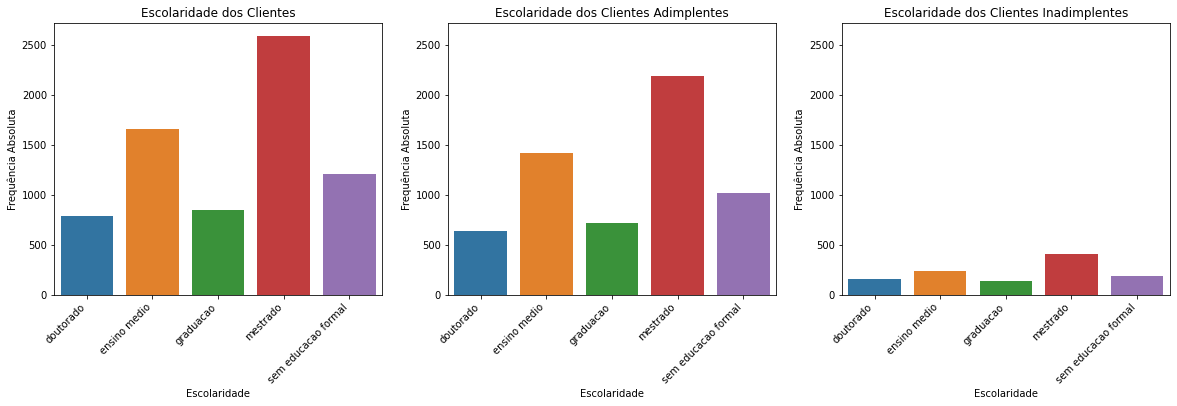

In [ ]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45, ha='right')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Salário Anual

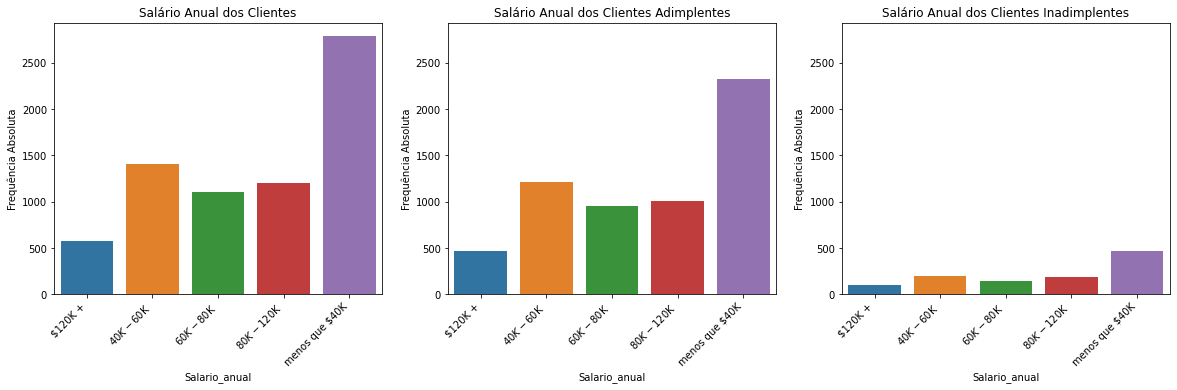

In [ ]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45, ha='right')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

As proporções nestes dois casos se mantém entre os grupos de adimplentes e inadimplentes.

##Visualizações numéricas

Vamos exibir quais são as variáveis numéricas da base.

Devemos retirar dessas colunas as variáveis de **id** e **default**.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Quantidade de Transações nos Últimos 12 Meses

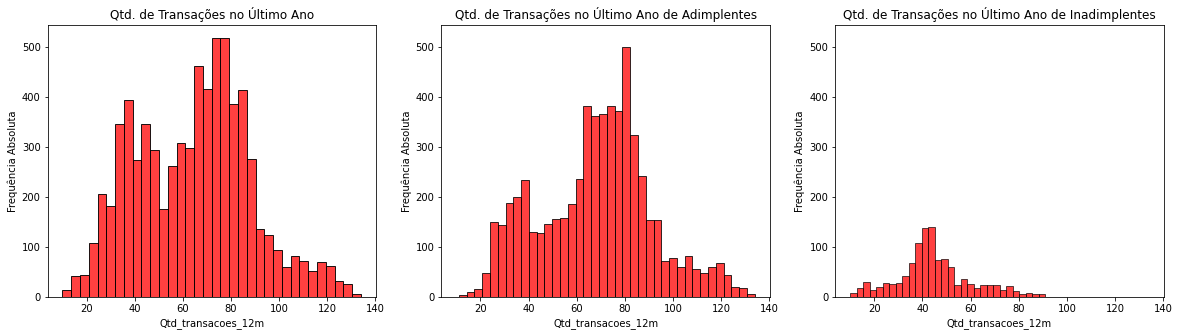

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, color='red',  stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Valor das Transações nos Últimos 12 Meses

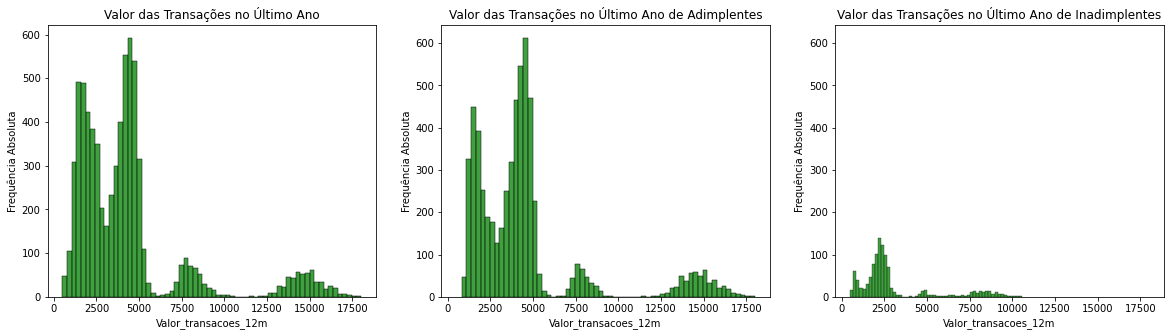

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, color='green', stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

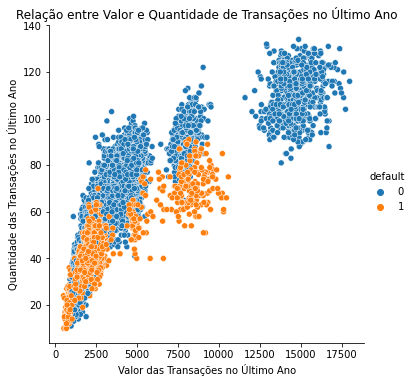

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

# Conclusão

Com a análise realizada podemos observar que existem um padrão de comportamento dos clientes que têm maior tendência a serem inadimplentes.

Esse comportamento tem um vínculo com a quantidade de de transações realizadas nos últmos 12 meses e com o valor das transações.

Com relação aos valores existem duas faixas que são transações na faixa entre 1.000 e 3.000 aproximadamente e entre 7.500 e 10.000.

Dentro destas duas faixas, os clientes com menor quantidade de transações nos últimos 12 meses são os que apresentam maior chance de inadimplência.

Analisando estes dados seria interessante o banco dar uma maior atenção a estes perfis afim de tentar reduzir essa possibilidade, ou oferencendo renegociações de dívidas ou agindo de forma pró-ativa com alguma ação.